# Final Project - EDAs and Hypotheses formulation
## Table of Content
#### 1- Brief description of the data set 
#### 2- Initial plan for data exploration
#### 3- Feature engineering
#### 4- Formulating at least 3 hypothesis 
#### 5- Suggestions for next steps in analyzing the data
#### 6- Conclusion
## Formulating hypothesis about Data scientists salaries in the US

## 1- Brief description of the data set 
The dataset is scraped from the Glassdoor website using Selenium scrapper. After scrapping, the raw dataset was cleaned and made usable for performing data analysis and modelling. The dataset contains information about the minimum salary, maximum salary, average salary, job description, age of the company in years, etc.

### Importing the data set
using pandas library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn  import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv (r'C:/Users/HP/Desktop/IBM machine learning/EDA/week 2/final project/data_cleaned_2021.csv')
### removing the additional axis
df = df.drop("index", axis=1)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,...,0,0,0,0,0,0,0,other scientist,sr,M
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,...,0,1,0,0,0,0,0,data engineer,sr,na
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,...,0,0,0,0,0,0,0,other scientist,na,P
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


## 2- Initial plan for data exploration
We wills start by choosing the related features that we believe that are correlated with maximum and minimum salaries of data scientists, we will then filter out the jobs that are not data scientist as well as remove the additional and not needed strings in the values.

## 3-  Feature engineering


### Selecting the needed columns

In [3]:
df = df[["Job Title","Salary Estimate", "Rating", "Location"]]

### Filtering the columns according to "Job Title" = "Data Scientist"

In [4]:
df = df[df['Job Title'] == "Data Scientist"]
# since all jobs are now data scientist then we don't need the "job title" column any more.
df = df.drop("Job Title", axis=1)

### Removing (Glassdoor est.) from the Salary Estimate estimate column

In [5]:
# changing the name of the column from salary estimate to salary to avoid having spaces in the column name 
# which could cause problem when applying some changes 
df.rename(columns = {'Salary Estimate': 'Salary'}, inplace = True)

In [6]:
df.replace(regex=['(Glassdoor est.)'], value='', inplace = True)


In [7]:
# using the code bellow to remove "()" because it was not removed by .replace
df['Salary'] = df['Salary'].str.replace(r" \(.*\)","")

<ipython-input-7-fb422a6c4910>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Salary'] = df['Salary'].str.replace(r" \(.*\)","")


In [8]:
#reseting the index
df.reset_index(inplace = True)
df = df.drop("index", axis=1)

### Splitting the Salary column to min and max

In [9]:
df[['Min Salary in K', 'Max Salary in K']] = df.Salary.str.split('-', expand = True)

In [10]:
df.drop(['Salary'], axis = 1, inplace = True)

### Removing additional strings

In [11]:
df['Min Salary in K'] = df['Min Salary in K'].str.replace("Employer Provided Salary:","")

In [12]:
df['Max Salary in K'] = df['Max Salary in K'].str.replace("(Employer est.)","")

<ipython-input-12-2fd8b7f3d55d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Max Salary in K'] = df['Max Salary in K'].str.replace("(Employer est.)","")


In [13]:
df['Min Salary in K'] = df['Min Salary in K'].str.replace("$","").str.replace("K","")
df['Max Salary in K'] = df['Max Salary in K'].str.replace("$","").str.replace("K","")
# droping observation 65 $ 102
df.drop(65, axis=0, inplace = True)
df.drop(103, axis=0, inplace = True)
# reseting the index
df.reset_index(inplace = True)
df = df.drop("index", axis=1)


<ipython-input-13-e5e6b327d1bc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Min Salary in K'] = df['Min Salary in K'].str.replace("$","").str.replace("K","")
<ipython-input-13-e5e6b327d1bc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Max Salary in K'] = df['Max Salary in K'].str.replace("$","").str.replace("K","")


### changing the mina and max salary columns to numeric

In [14]:
df['Rating']=pd.to_numeric(df['Rating'])
df['Max Salary in K']=pd.to_numeric(df['Max Salary in K'])
df['Min Salary in K']=pd.to_numeric(df['Min Salary in K'])

In [15]:
df.dtypes

Rating             float64
Location            object
Min Salary in K      int64
Max Salary in K      int64
dtype: object

# Visualization 

### Scatter graph for Rating Vs Max & Min Salary

In [16]:
#arranging the dataset descendingly according to "Rating"
df.sort_values(by=['Rating'], inplace=True, ascending=True)
df.reset_index(inplace = True)
df = df.drop("index", axis=1)

<AxesSubplot:xlabel='Rating'>

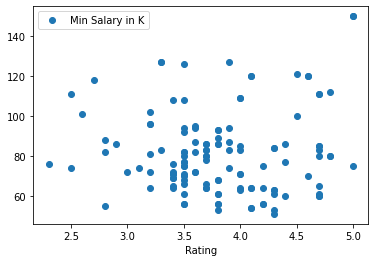

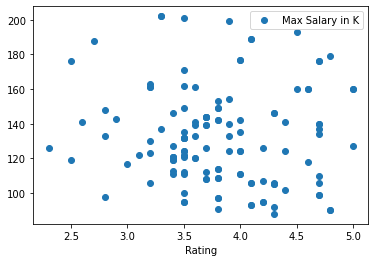

In [17]:
df.plot(x='Rating', y='Min Salary in K', style='o')
df.plot(x='Rating', y='Max Salary in K', style='o')

We conclude that the rating does not have a significant effect on the min and max salaries
## 4- Formulating  3 hypothesis 
### First Hypothesis:
#### The correlation between locations and max salary is above 0.1 (Confidence level of 95%)
##### Testing the correlation between the locations and Max salaries

In [18]:
# create a LabelEncoder object and fit it to each feature in X
dfL = pd.get_dummies(df).corr()["Max Salary in K"].iloc[3:69]
dfL[dfL>0.1].count()

10

as we can see there is only 10 locations that are the has a correlation with maximum salary that is above 0.1, which means only 10/66 = 15.15% which is not even close 95% confidence level which means this hypothesis is rejected

the correlation between the location column and other columns is ver week so we should drop the location column

In [19]:
df = df.drop("Location", axis=1)

### Second Hypothesis
####  Maximum salaries with a rating that is above 3 are above 90K (Confidence level of 95%)

In [20]:
dfS = df[df["Rating"]>3]
dfS["Max Salary in K"][dfS["Max Salary in K"] > 90].count()

116

as we can see that the number of salaries that have ratings above 3 that are above 90K is 116, which out of 119 salaries that have a rating above 3 is 97.48%, which means that we can accept this hypothesis

### Third Hypothesis
####  Minimum salaries with a rating that is above 3 are above 50K (Confidence level of 95%)

In [21]:
p1 = dfS["Min Salary in K"][dfS["Min Salary in K"] > 70].count()
p2 = dfS["Min Salary in K"].count()
print("the total number of the minimum salaries that have a rating above three is", p2)
print("the total number of minimum salaries that have a rating above three and are above 70K is ", p1)
print("the percenatge of minimum salaries that are above 70K and have a rating above 3 is ", (p1/p2)*100,"%")

the total number of the minimum salaries that have a rating above three is 119
the total number of minimum salaries that have a rating above three and are above 70K is  78
the percenatge of minimum salaries that are above 70K and have a rating above 3 is  65.54621848739495 %


as we can see 65.55% is not even near our confidence level which is 95%, which means we can safely reject this hypothsis

## 5- Suggestions for next steps in analyzing the data
I would suggest to find more parameters that might help in analyzing the ranges of salaris to improve the overall accuracy.

## 6- Conclusion
In conclusion, we mainly did data manipulation and feature engineering (which were the most complicated part in this project)to prepare the data for forming useful hyphotheses. We then did two scatter plots, one for maximum and one for minimum salaries Vs rating to see the effect of rating on maximum and minimum salaries, then we formed three hypotheses and tested them to see if we can reject them or approve them with 95% confidence level.